In [7]:

try:
    data = pd.read_csv("stocks4.csv", encoding='utf-8',index_col=0)
except UnicodeDecodeError:
    data = pd.read_csv("stocks4.csv", encoding='gbk',index_col=0)
data.head()

,中国宝安,深科技,特力Ａ,富奥股份,德赛电池,深天马Ａ,深圳华强,中兴通讯,美的集团,潍柴动力,...,联赢激光,豪森智能,科威尔,孚能科技,新致软件,金博股份,菱电电控,银河微电,瑞可达,天能股份
Date,,,,,,,,,,,,,,,,,,,,,
2023-1-3,12.22,10.99,17.690001,4.48,40.833878,8.83,12.31,25.930000,51.880001,10.27,...,30.629999,22.860001,49.980000,27.350000,10.34,149.189194,89.449997,23.469999,77.142860,37.750000
2023-1-4,12.15,11.22,17.860001,4.51,39.420078,8.85,12.25,26.440001,53.750000,10.39,...,30.990000,22.820000,50.599998,27.110001,10.75,146.418915,88.750000,23.360001,74.735718,37.279999
2023-1-5,12.26,11.26,17.889999,4.62,42.284641,8.89,12.33,26.440001,54.910000,10.70,...,30.940001,23.240000,51.000000,27.900000,10.76,155.385132,91.989998,23.680000,78.571426,37.950001
2023-1-6,12.28,11.25,17.700001,4.67,42.414009,8.90,12.12,26.000000,54.009998,10.65,...,31.150000,23.450001,50.889999,27.219999,10.63,157.972977,95.360001,23.610001,80.142860,37.990002
2023-1-9,12.19,11.25,17.940001,4.67,42.894516,8.91,11.99,25.639999,54.110001,10.87,...,30.700001,23.410000,52.160000,27.139999,10.69,170.378372,96.070000,23.730000,77.742859,38.259998


In [25]:
import pandas as pd
import numpy as np

# 生成示例时间序列数据
np.random.seed(0)
index = pd.date_range('2023-01-01', periods=365)  # 生成一年的时间序列数据
data = np.sin(np.linspace(0, 2*np.pi, 365)) + np.random.normal(0, 0.1, 365)  # 示例数据，包含周期性成分和噪声
ts = pd.Series(data, index=index)

# 计算周期性指数（CPI）
fft_result = np.fft.fft(ts.values)
freqs = np.fft.fftfreq(len(ts))
amplitudes = np.abs(fft_result) / len(ts)

# 只保留频率大于0的部分，因为频谱是对称的，且频率为0的部分不包含周期性信息
cpi = amplitudes[(freqs > 0) & (freqs < 0.5)].mean()  # 假设频率范围为(0, 0.5)，可以根据实际情况调整
print("周期性指数（CPI）：", cpi)

周期性指数（CPI）： 0.0073049966083313595


In [28]:
import pandas as pd
import numpy as np

# 读取 CSV 文件
try:
    data = pd.read_csv("stocks4.csv", encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv("stocks4.csv", encoding='gbk')

df = data

# 提取日期列和股票收盘价列
dates = pd.to_datetime(df['Date'])
stock_prices = df.drop(columns=['Date'])

# 创建一个空 DataFrame 用于存储周期性指数
cpi_df = pd.DataFrame(columns=stock_prices.columns)

# 循环遍历每列（每家公司）
for company_name, stock_prices_col in stock_prices.items():
    # 生成时间序列数据
    ts = pd.Series(stock_prices_col.values, index=dates)
    
    # 计算周期性指数（CPI）
    fft_result = np.fft.fft(ts.values)
    freqs = np.fft.fftfreq(len(ts))
    amplitudes = np.abs(fft_result) / len(ts)
    cpi = amplitudes[(freqs > 0) & (freqs < 0.5)].mean()
    
    # 将周期性指数添加到 DataFrame 中
    cpi_df[company_name] = [cpi]

# 将周期性指数保存为 CSV 文件
cpi_df.to_csv('cpi_stocks.csv', index=False)

print("周期性指数已保存到 cpi_stocks.csv")


周期性指数已保存到 cpi_stocks.csv


In [8]:
import pandas as pd
import numpy as np


# 从价格历史中提取最新价格
latest_price = data.iloc[-1]


# 计算每支股票的价格波动性（标准差）
volatility = data.pct_change().std()


# 定义低价格和低波动性的阈值
price_threshold = 2
volatility_threshold = 0.02

# 筛选出价格高于阈值的股票
low_price = latest_price[latest_price > price_threshold]

# 筛选出波动性高于阈值的股票
low_volatility = volatility[volatility > volatility_threshold]

# 交集操作，找出价格和波动性都低于阈值的股票
selected_stocks = low_price.index.intersection(low_volatility.index)


print(f'找到{len(selected_stocks)}支股票')

找到378支股票


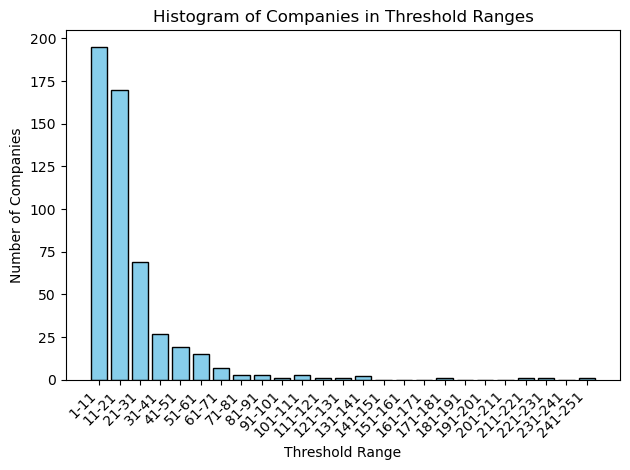

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 从文件中读取数据
data = pd.read_csv("statistics_summary.csv", encoding='utf-8', index_col=0)

# 获取mean行数据
mean_row = data.loc['mean']

# 定义阈值范围
thresholds = range(1, 252, 10)

# 存储每个区间中的公司数量
num_companies = []

# 遍历不同的阈值范围
for i in range(len(thresholds)-1):
    threshold_lower = thresholds[i]
    threshold_upper = thresholds[i+1]
    
    # 统计在该区间上的公司数量
    num = ((mean_row >= threshold_lower) & (mean_row <= threshold_upper)).sum()
    num_companies.append(num)

# 绘制直方图
plt.bar(range(len(num_companies)), num_companies, color='skyblue', edgecolor='black')
plt.xlabel('Threshold Range')
plt.ylabel('Number of Companies')
plt.title('Histogram of Companies in Threshold Ranges')
plt.xticks(range(len(num_companies)), [f'{thresholds[i]}-{thresholds[i+1]}' for i in range(len(thresholds)-1)], rotation=45, ha='right')
plt.tight_layout()

# 保存图像并设置dpi为600
plt.savefig('histogram.png', dpi=600)

plt.show()


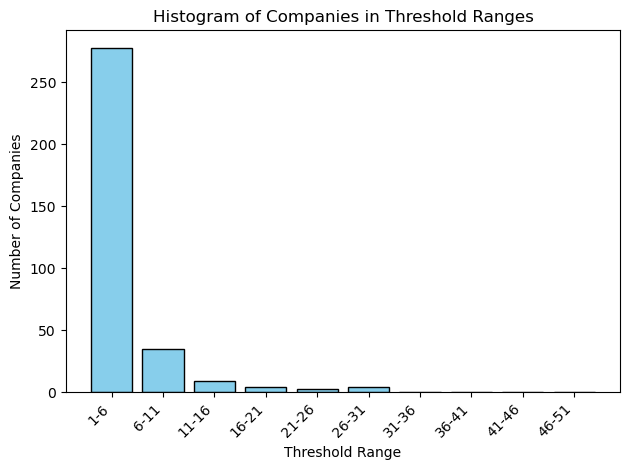

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 从文件中读取数据
data = pd.read_csv("statistics_summary.csv", encoding='utf-8', index_col=0)

# 获取std行数据
std_row = data.loc['std']

# 定义阈值范围
thresholds = range(1, 52, 5)

# 存储每个区间中的公司数量
num_companies = []

# 遍历不同的阈值范围
for i in range(len(thresholds)-1):
    threshold_lower = thresholds[i]
    threshold_upper = thresholds[i+1]
    
    # 统计在该区间上的公司数量
    num = ((std_row >= threshold_lower) & (std_row <= threshold_upper)).sum()
    num_companies.append(num)

# 绘制直方图
plt.bar(range(len(num_companies)), num_companies, color='skyblue', edgecolor='black')
plt.xlabel('Threshold Range')
plt.ylabel('Number of Companies')
plt.title('Histogram of Companies in Threshold Ranges')
plt.xticks(range(len(num_companies)), [f'{thresholds[i]}-{thresholds[i+1]}' for i in range(len(thresholds)-1)], rotation=45, ha='right')
plt.tight_layout()

# 保存图像并设置dpi为600
plt.savefig('histogram.png', dpi=600)

plt.show()


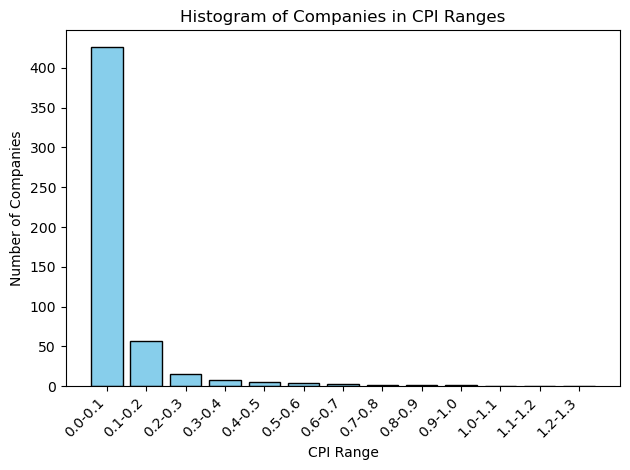

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 从文件中读取数据
try:
    data = pd.read_csv("cpi_stocks.csv",index_col=0, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv("cpi_stocks.csv", index_col=0,encoding='gbk')
    

# 获取CPI数据
cpi = data.loc['cpi']

# 定义区间范围
bins = [i/10 for i in range(0, 14)]

# 统计在每个区间中的公司数量
num_companies = pd.cut(cpi, bins).value_counts()

# 绘制直方图
plt.bar(range(len(num_companies)), num_companies, color='skyblue', edgecolor='black')
plt.xlabel('CPI Range')
plt.ylabel('Number of Companies')
plt.title('Histogram of Companies in CPI Ranges')
plt.xticks(range(len(num_companies)), [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], rotation=45, ha='right')
plt.tight_layout()

# 保存图像并设置dpi为600
plt.savefig('histogram.png', dpi=600)

plt.show()


In [2]:
pip install xlrd

     --------------------------------------- 96.5/96.5 kB 52.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# 读取 Excel 文件
df = pd.read_excel('feature.xls')

# 统计名为 feature 的列中数字 1 到 6 的个数
counts = df['feature'].value_counts().sort_index()

# 计算占比
total_samples = counts.sum()
percentages = counts / total_samples * 100

# 输出结果
for i in range(1, 7):
    count = counts.get(i, 0)
    percentage = percentages.get(i, 0)
    print(f"数字 {i} 的个数为: {count}, 占比为: {percentage:.2f}%")


数字 1 的个数为: 97, 占比为: 18.65%
数字 2 的个数为: 91, 占比为: 17.50%
数字 3 的个数为: 105, 占比为: 20.19%
数字 4 的个数为: 81, 占比为: 15.58%
数字 5 的个数为: 58, 占比为: 11.15%
数字 6 的个数为: 88, 占比为: 16.92%
